In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

# Discrete Fourier Transform

$${\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}}$$

In [ ]:
def fourier(start, stop, step, f):
    x = np.arange(start,stop,step)
    y = f(x)
    fig, axis = plt.subplots(3, 2)
    fig.tight_layout(pad=1.0)

    axis[0, 0].plot(x, y)
    axis[0, 0].set_title("function cont")
    axis[0, 1].scatter(x, y)
    axis[0, 1].set_title("function disc")

    axis[1, 0].plot(x, np.real(np.fft.fft(y)))
    axis[1, 0].set_title("real fft cont")
    axis[1, 1].scatter(x, np.real(np.fft.fft(y)))
    axis[1, 1].set_title("real fft disc")

    axis[2, 0].plot(x, np.imag(np.fft.fft(y)))
    axis[2, 0].set_title("imag fft cont")
    axis[2, 1].scatter(x, np.imag(np.fft.fft(y)))
    axis[2, 1].set_title("imag fft disc")

    plt.show()

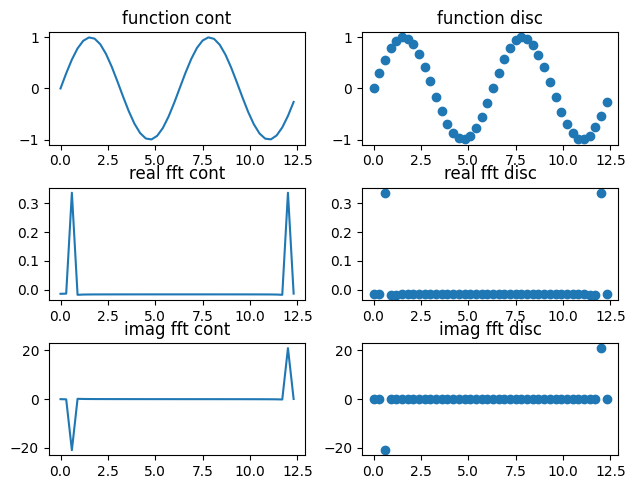

In [ ]:
fourier(0, 4 * np.pi, 0.3, np.sin)

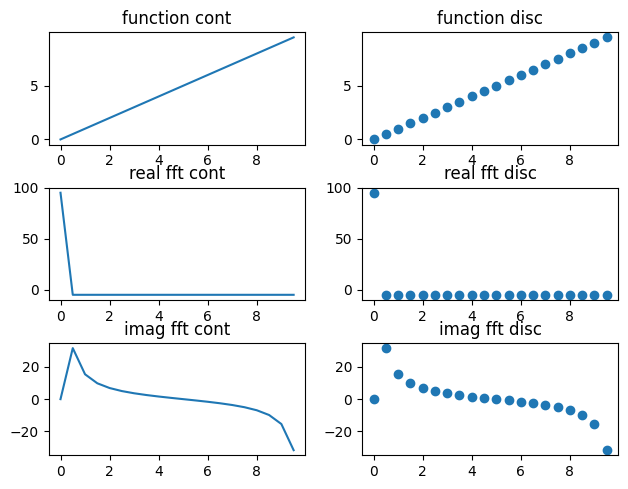

In [ ]:
fourier(0, 10, 0.5, lambda x : x)

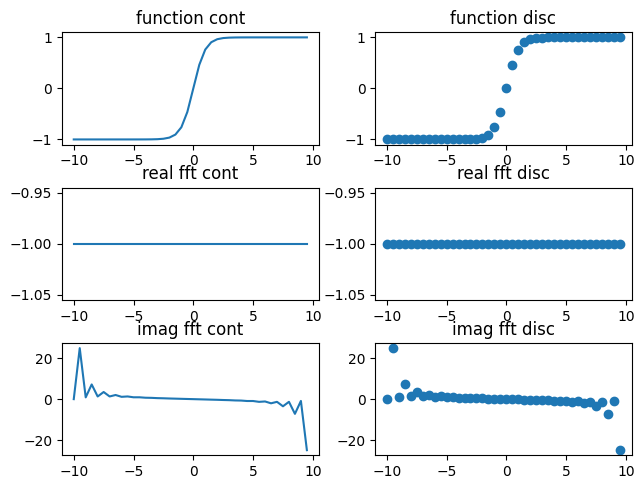

In [ ]:
fourier(-10, 10, 0.5, np.tanh)

Can be viewed as a matrix transform. Known as the DFT matrix

$${\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}}$$



```
# This is formatted as code
```

![bruh](https://wikimedia.org/api/rest_v1/media/math/render/svg/e05e8a1703420671b7ec9a7b245fa3280bd5cc33)

$${\displaystyle \omega =e^{-2\pi i/N}}$$
$$X=Wx$$

In [ ]:
np.fromfunction(lambda x, y : np.exp(-1j * 2 * np.pi * x * y * 0.2), (5,5))

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ],
       [ 1.        +0.j        ,  0.30901699-0.95105652j,
        -0.80901699-0.58778525j, -0.80901699+0.58778525j,
         0.30901699+0.95105652j],
       [ 1.        +0.j        , -0.80901699-0.58778525j,
         0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -0.80901699+0.58778525j],
       [ 1.        +0.j        , -0.80901699+0.58778525j,
         0.30901699-0.95105652j,  0.30901699+0.95105652j,
        -0.80901699-0.58778525j],
       [ 1.        +0.j        ,  0.30901699+0.95105652j,
        -0.80901699+0.58778525j, -0.80901699-0.58778525j,
         0.30901699-0.95105652j]])

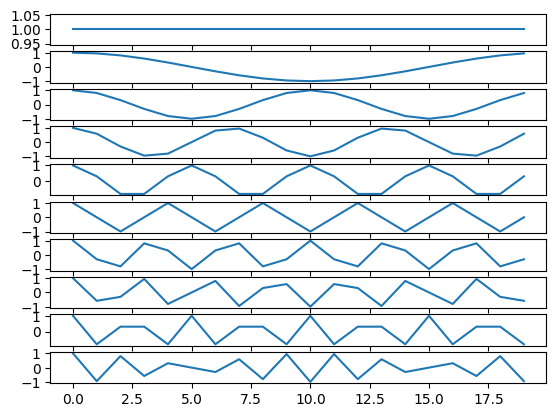

In [ ]:
transform = np.fromfunction(lambda x, y : np.real(np.exp(-1j * 2 * np.pi * x * y * (1/20))), (20,20))
fig, axis = plt.subplots(10)
for i in range(10):
    axis[i].plot(transform[i])
plt.show()

# Band-pass filtering

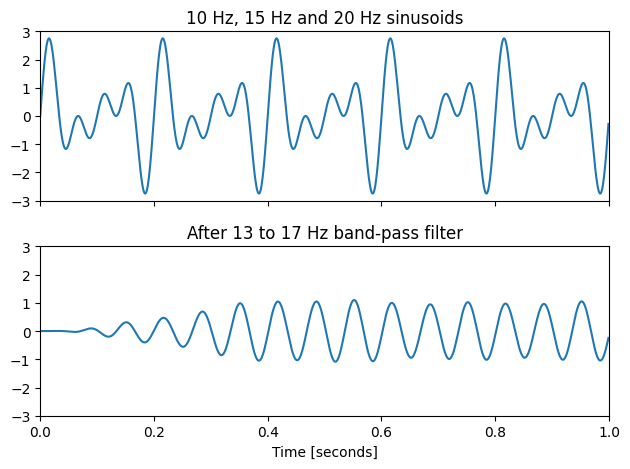

In [ ]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*15*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz, 15 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -3, 3])

sos = signal.butter(4, [13, 17], 'bp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 13 to 17 Hz band-pass filter')
ax2.axis([0, 1, -3, 3])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

![band_pass_filter](https://www.electronicshub.org/wp-content/uploads/2015/01/Active-Band-Pass-Filter-Featured-Image.jpg)

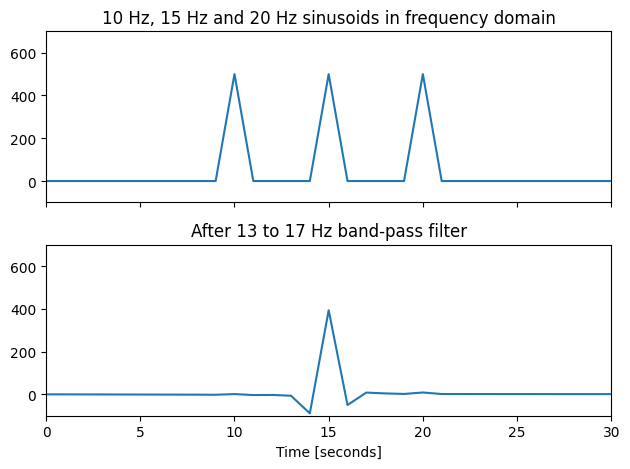

In [ ]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*15*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(-np.imag(np.fft.fft(sig)))
ax1.set_title('10 Hz, 15 Hz and 20 Hz sinusoids in frequency domain')
ax1.axis([0, 30, -100, 700])

sos = signal.butter(4, [13, 17], 'bp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(-np.imag(np.fft.fft(filtered)))
ax2.set_title('After 13 to 17 Hz band-pass filter')
ax2.axis([0, 30, -100, 700])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Across the data, the frequency of waves increases till the middle. Essentially our GFT must be made of increasingly frequent waves

# Plotting signals on graphs

In [ ]:
def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

def normal_plot(G, seed = 779):
    pos = nx.spring_layout(G, dim=3, seed=seed)
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w")

    # Plot the edges
    for vizedge in edge_xyz:
        ax.plot(*vizedge.T, color="tab:gray")
    _format_axes(ax)
    fig.tight_layout()
    plt.show()

def signal_plot(G, signals, seed = 779):
    pos = nx.spring_layout(G, dim=3, seed=seed)
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w")

    for i in range(len(G)):
        if(signals[i] > 0):
            ax.plot([pos[i][0], pos[i][0]], [pos[i][1],pos[i][1]],zs=[pos[i][2],pos[i][2]+signals[i]], color="green")
        else:
            ax.plot([pos[i][0], pos[i][0]], [pos[i][1],pos[i][1]],zs=[pos[i][2],pos[i][2]+signals[i]], color="red")

    # Plot the edges
    for vizedge in edge_xyz:
        ax.plot(*vizedge.T, color="tab:gray")
    _format_axes(ax)
    fig.tight_layout()
    plt.show()

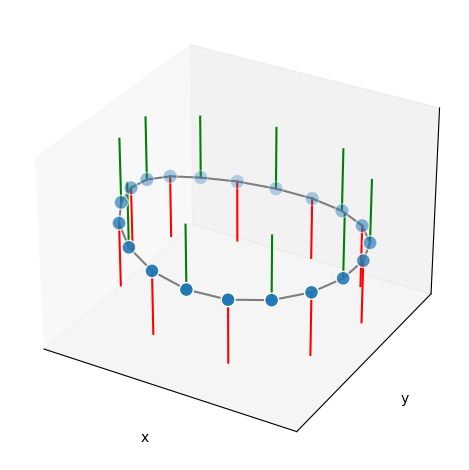

In [ ]:
node_count = 20
# The graph signals
signals = np.zeros(node_count)
for i in range(node_count):
    signals[i] = (i % 2) * 2 - 1

# The graph to visualize
G = nx.cycle_graph(node_count)
signal_plot(G, signals)

# Smootheness measurement with laplacian transform

In [ ]:
adj_mat = np.array([[0,1,1,0,0,0,0],
                    [1,0,0,1,0,0,0],
                    [1,0,0,1,0,0,0],
                    [0,1,1,0,1,0,0],
                    [0,0,0,1,0,1,1],
                    [0,0,0,0,1,0,0],
                    [0,0,0,0,1,0,0]])
G = nx.from_numpy_array(adj_mat)

Laplacian matrix of the graph

In [ ]:
nx.laplacian_matrix(G).toarray()

array([[ 2, -1, -1,  0,  0,  0,  0],
       [-1,  2,  0, -1,  0,  0,  0],
       [-1,  0,  2, -1,  0,  0,  0],
       [ 0, -1, -1,  3, -1,  0,  0],
       [ 0,  0,  0, -1,  3, -1, -1],
       [ 0,  0,  0,  0, -1,  1,  0],
       [ 0,  0,  0,  0, -1,  0,  1]])

Smootheness function

$$s = f^TLf$$

In [ ]:
def smootheness(G, signals):
    return np.matmul(signals.T, np.matmul(nx.laplacian_matrix(G).toarray(), signals))

Smootheness: 0.0


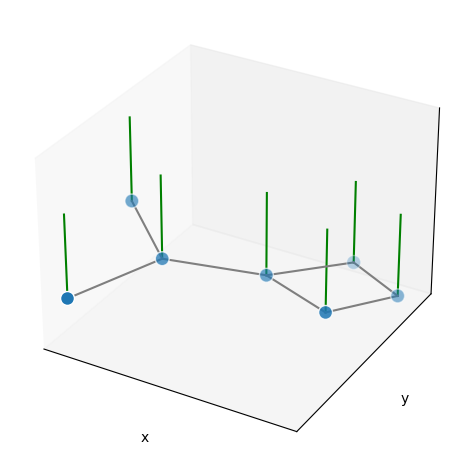

In [ ]:
signals0 = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
print("Smootheness: " + str(smootheness(G, signals0)))
signal_plot(G, signals0, seed = 314)

Smootheness: 28.0


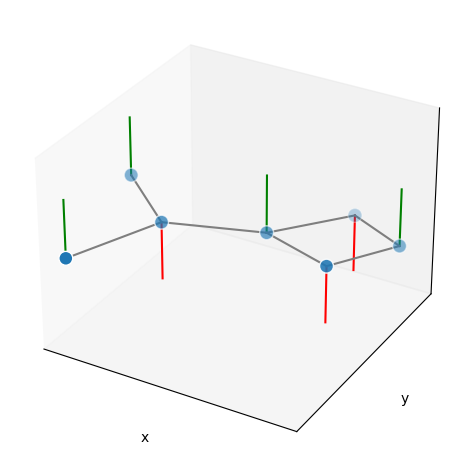

In [ ]:
signals1 = np.array([1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0])
print("Smootheness: " + str(smootheness(G, signals1)))
signal_plot(G, signals1, seed = 314)

# Graph Fourier Transform

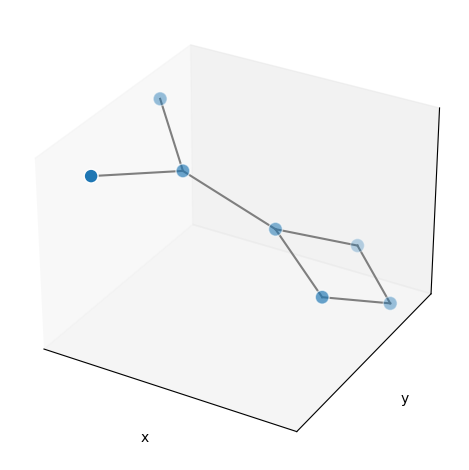

In [ ]:
normal_plot(G, seed = 9999)

$$L=U\Lambda U^T$$

In [ ]:
eigenvalues, U = np.linalg.eigh(nx.laplacian_matrix(G).toarray())

Eigenvector 0

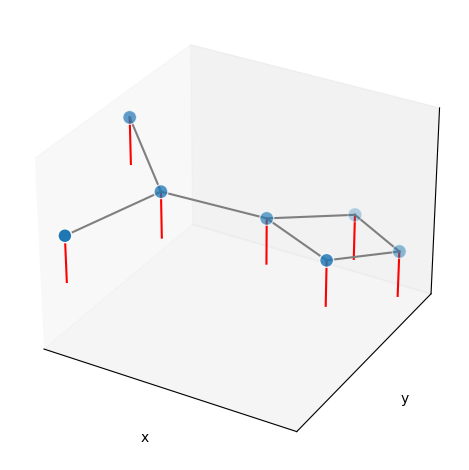

In [ ]:
signal_plot(G, U[:,0], seed = 314)

Eigenvector 1

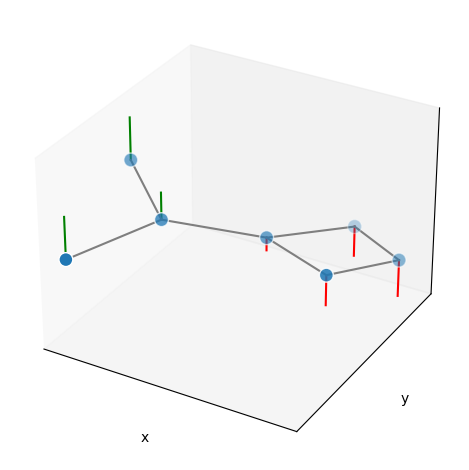

In [ ]:
signal_plot(G, U[:,1], seed = 314)

Eigenvector 5

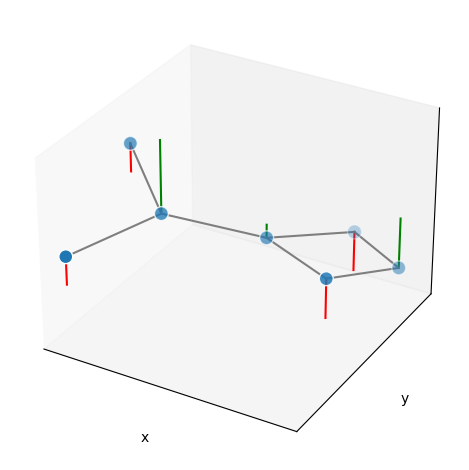

In [ ]:
signal_plot(G, U[:,5], seed = 314)

Eigenvector 6

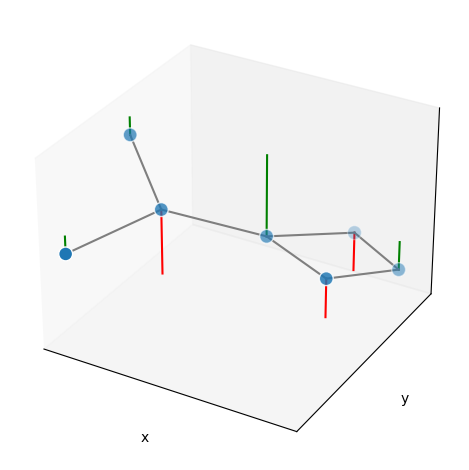

In [ ]:
signal_plot(G, U[:,6], seed = 314)

$$\text{diag}(\Lambda)$$

In [ ]:
eigenvalues.round(3)

array([-0.   ,  0.359,  1.   ,  2.   ,  2.276,  3.589,  4.776])

$$\Lambda = U^TLU$$

In [ ]:
np.matmul(U.T, np.matmul(nx.laplacian_matrix(G).toarray(), U)).round(3)

array([[ 0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ],
       [-0.   ,  0.359, -0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   , -0.   , -0.   ,  0.   , -0.   ],
       [ 0.   ,  0.   , -0.   ,  2.   ,  0.   , -0.   , -0.   ],
       [ 0.   ,  0.   , -0.   ,  0.   ,  2.276,  0.   ,  0.   ],
       [-0.   ,  0.   , -0.   ,  0.   ,  0.   ,  3.589, -0.   ],
       [ 0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   ,  4.776]])

In [ ]:
for i in range(7):
    print("Smootheness of eigenvector " + str(i) + ": " + str(smootheness(G, U[:, i]).round(3)))

Smootheness of eigenvector 0: -0.0
Smootheness of eigenvector 1: 0.359
Smootheness of eigenvector 2: 1.0
Smootheness of eigenvector 3: 2.0
Smootheness of eigenvector 4: 2.276
Smootheness of eigenvector 5: 3.589
Smootheness of eigenvector 6: 4.776


# Graph spectral filtering

### Low pass filtering

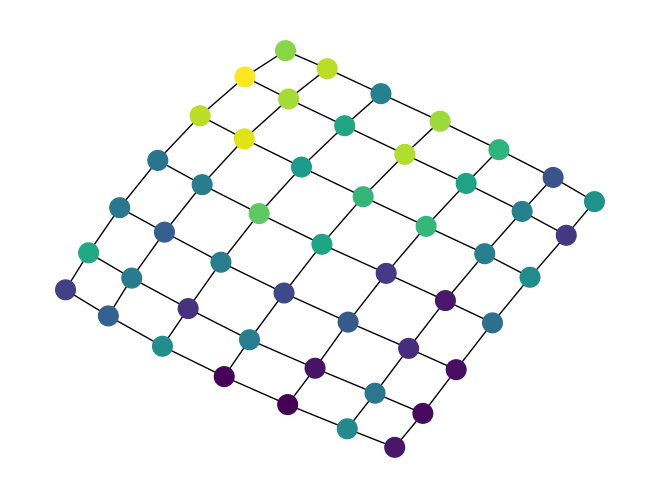

In [ ]:
H = nx.grid_2d_graph(7, 7)  # 5x5 grid

val_map = {}
for i in range(7):
    for j in range(7):
        val_map[(i,j)] = i + j + np.random.uniform(-5,5)
values = np.array([val_map.get(node) for node in H.nodes()])
values /= (np.max(values) - np.min(values))

pos = nx.spring_layout(H, seed=200)
nx.draw(H,  pos, node_size=200, cmap=plt.cm.viridis, node_color=values)
plt.show()

$$L=U\Lambda U^T$$

In [ ]:
eigenvalues, U = np.linalg.eigh(nx.laplacian_matrix(H).toarray())

$$g(x) = \frac{1}{1+τx}$$

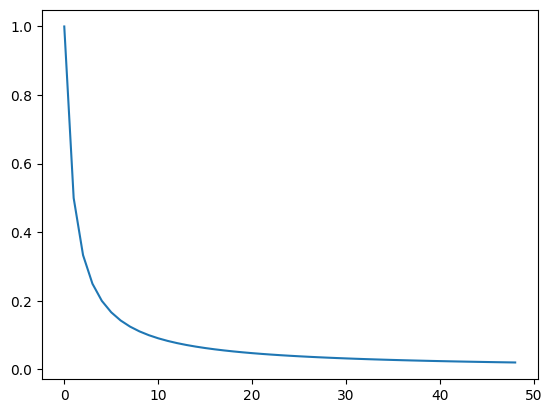

In [ ]:
tau = 1
def g(x):
    return 1/(1 + tau * x)
filter = g(np.arange(0, 49))
plt.plot(filter)

In [ ]:
new_values = np.matmul(U, np.matmul(np.diag(filter), np.matmul(U.T, np.array(values))))

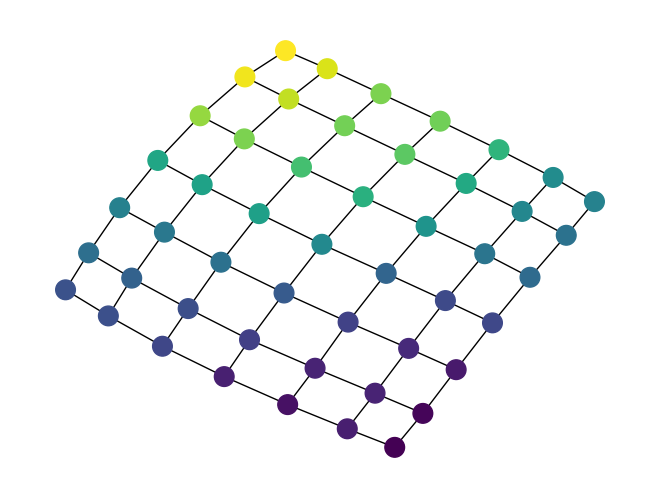

In [ ]:
pos = nx.spring_layout(H, seed=200)
nx.draw(H,  pos, node_size=200, cmap=plt.cm.viridis, node_color=new_values)
plt.show()

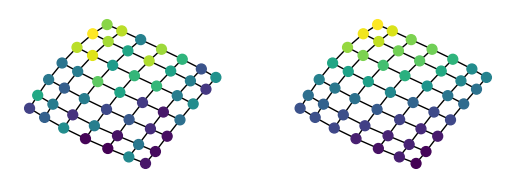

Original smootheness: 5.547468286753194
New smootheness: 0.06246897069829024


In [ ]:
plt.subplot(221)
pos = nx.spring_layout(H, seed=200)
nx.draw(H,  pos, node_size=50, cmap=plt.cm.viridis, node_color=values)
plt.subplot(222)
pos = nx.spring_layout(H, seed=200)
nx.draw(H,  pos, node_size=50, cmap=plt.cm.viridis, node_color=new_values)
plt.show()
print("Original smootheness: " + str(smootheness(H, values)))
print("New smootheness: " + str(smootheness(H, new_values)))